In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

import pt_utils
import pt_musicutils
import pt_analyzeMIDI
import pt_analyzeaudio
import pt_naming_conventions
from harmony_state import harmony_state

# a standardized graph for harmonic analysis on the time domain

In [2]:
h = harmony_state()
h.string_description()

hex unique id (harmony hash): 0x00238c4 
[0 0 0 4 3] 
0b100011000100
==-- derived meanings: --==
 (conventional) mode: C Major (tonic) 
(conventional) chord: F functioning as IV  
(non-entropic) base: F Lydian 

== chromatic (12-note pitch-class) locations: 
chord notes: [0 4 5 9] : F A C E 
scale notes: [ 0  2  4  5  7  9 11] : F G A B C D E 

== modes and chords over roots (modal scales) 
   chord measured from root: [ 0  4  7 11] 
 root: 5 (F A C E)
    mode measured from chord root: [ 0  2  4  6  7  9 11] 
 root : 5 (F G A B C D E)
displacement/mode *** for DAW settings: ***
    tonic scale: [ 0  2  4  5  7  9 11] 
 starting from: 0

== chord/scale degree (7-note) locations: [3 5 0 2]


In [3]:
a_kpdve = h.current_kpdve
ng = h.current_binary

def heatmap_col_mask_for_kpdve_bin(a_kpdve, ng):
    k = (pt_utils.single_bit_loc(pt_musicutils.circle_conv_lyd_center_for_KPDVE(a_kpdve))) % 12
    p = (pt_utils.single_bit_loc(pt_musicutils.circle_conv_tonic_for_KPDVE(a_kpdve))) % 12
    d = (pt_utils.single_bit_loc(pt_musicutils.circle_root_note_for_KPDVE(a_kpdve))) % 12
    e = (pt_utils.single_bit_loc(pt_musicutils.circle_ext_note_for_KPDVE(a_kpdve))) % 12

    kpd_part = [k, p, d]
    e_part = [e]
    msk_lin = [1]
    
    ng_circ = pt_utils.c_chrom_to_f_circle(ng) 
    bin_notes = pt_utils.binary_notegroup_to_numpy_array(ng_circ)
    
    notes = list(bin_notes * np.array([i for i in range(12)]))
    mask = np.array([0,0,0] + msk_lin + list(1-bin_notes) + msk_lin + [0])

    full_column = np.array(kpd_part + msk_lin + notes + msk_lin + e_part)
    return full_column, mask

def data_and_mask_for_kpdve_a_bin_a_heatmap(kpdve_a, bin_a):
    heatmap = []
    mask = []
    for k, b in zip(kpdve_a, bin_a):
        col, msk = heatmap_col_mask_for_kpdve_bin(k, b)
        heatmap.append(np.flipud(col))
        mask.append(np.flipud(msk))

    return np.array(heatmap).T, np.array(mask).T

def bin_a_kpdve_a_heatmap(bin_a, kpdve_a, title=None):
    data, mask = data_and_mask_for_kpdve_a_bin_a_heatmap(kpdve_a, bin_a)

    hue = 0.27
    sat = 1.0
    light = 0.8
    fig, ax = plt.subplots(figsize=(17, 3))

    spacer_tick = ["=="]
    yticks = ["k", "p", "d"] + spacer_tick + pt_naming_conventions.circle_fifth_notes()+ spacer_tick + ["e"]
    yticks = yticks[::-1]
    sb.heatmap(data,
               ax=ax,
               mask=mask,
               cbar=False, 
               cmap=sb.husl_palette(12, h=hue, l=light, s=sat),
               xticklabels=[], 
               yticklabels=yticks)
    
    ax.set_facecolor("black")
    ax.set_title(title, fontsize=16)
    plt.show()

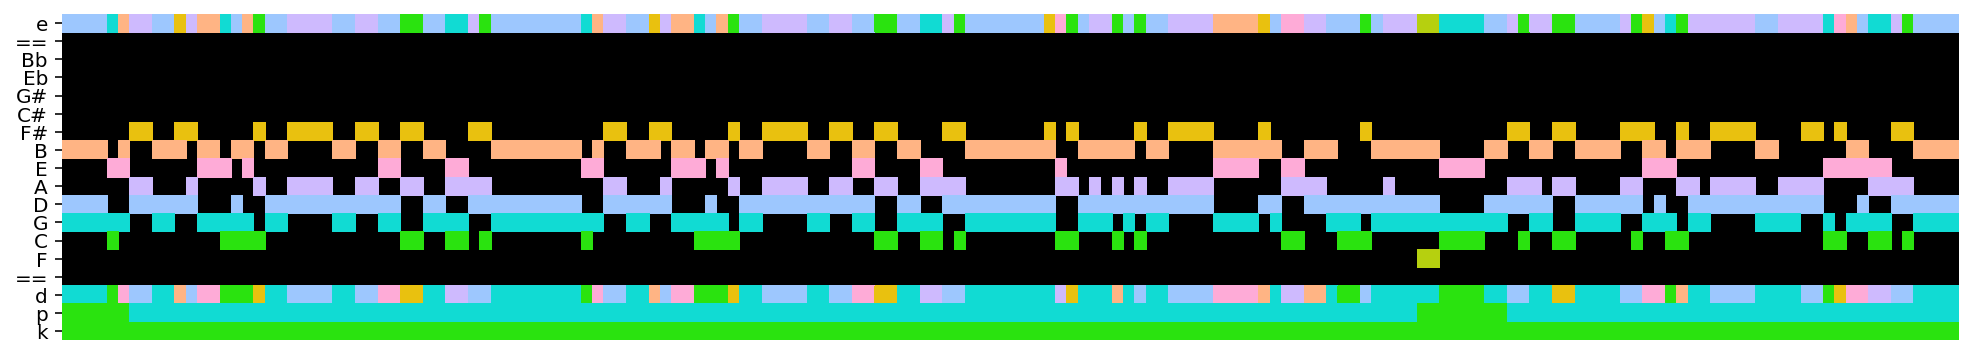

In [4]:
midipath = "/Users/johntimothysummers/Desktop/01ausmei.mid"
bin_a, kpdve_a = pt_analyzeMIDI.analyze_notation_file(midipath, beats_per_slice=0.125)
bin_a_kpdve_a_heatmap(bin_a, kpdve_a, title=None)

/Users/johntimothysummers/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


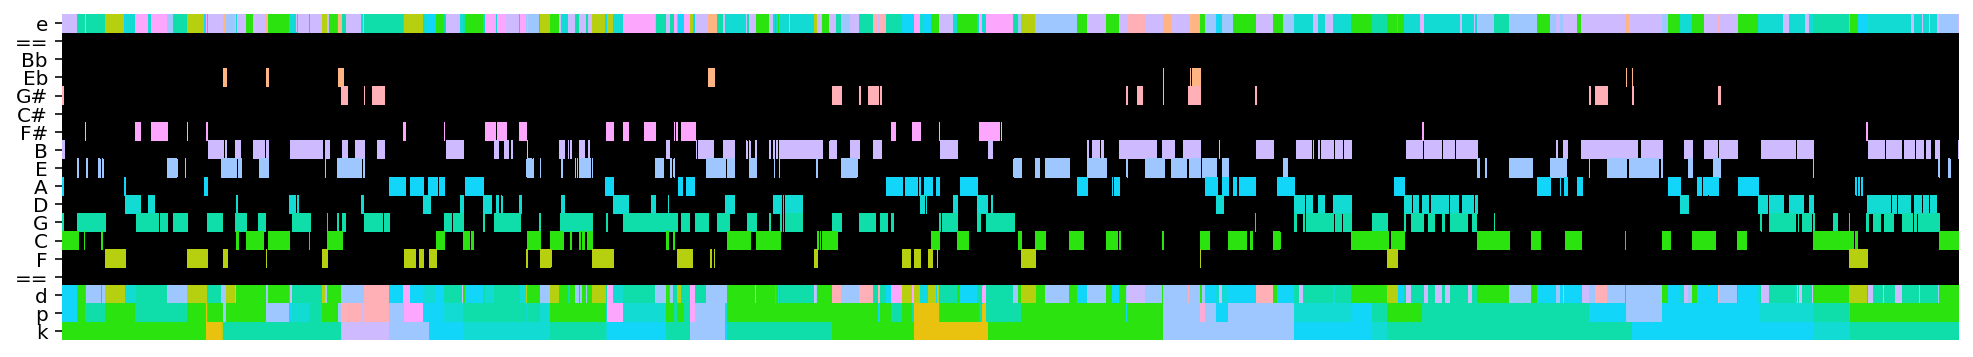

In [5]:
audiopath = "/Users/johntimothysummers/Desktop/beethoven-lv-111-2-01.mp3"
bin_a, kpdve_a = pt_analyzeaudio.kpdve_analyze_audiofile(audiopath)
bin_a_kpdve_a_heatmap(bin_a, kpdve_a, title=None)

/Users/johntimothysummers/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


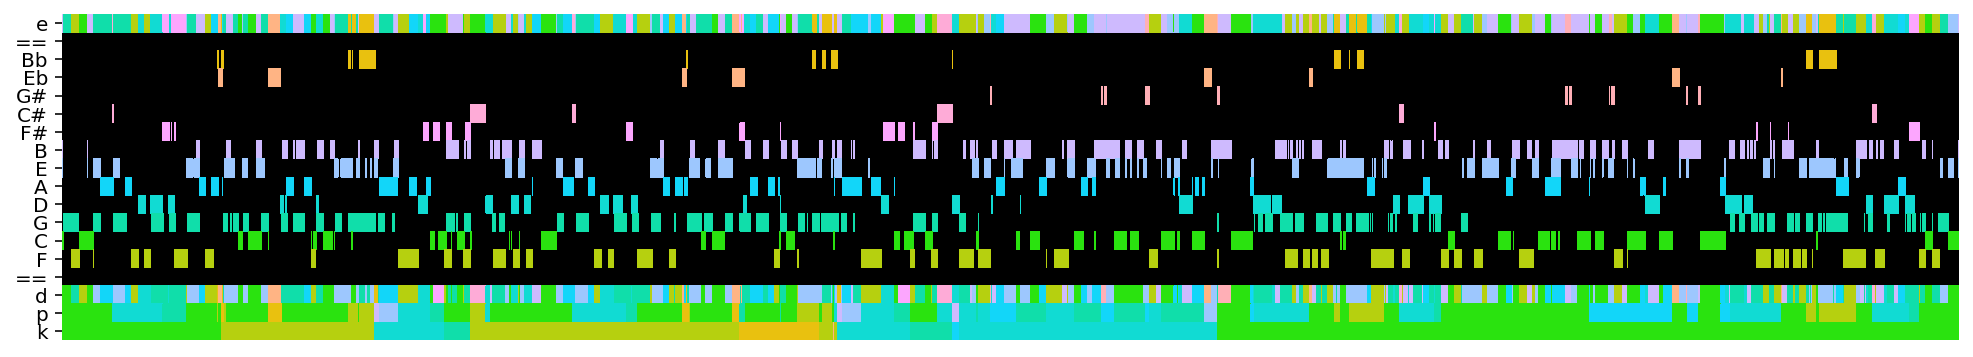

In [6]:
audiopath = "/Users/johntimothysummers/Desktop/beethoven-lv-111-2-02.mp3"
bin_a, kpdve_a = pt_analyzeaudio.kpdve_analyze_audiofile(audiopath)
bin_a_kpdve_a_heatmap(bin_a, kpdve_a, title=None)